# Exploratory Data Analysis of ChEMBL Dataset

In [ ]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import rdkit
import polars.selectors as cs
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns


print('Libraries imported successfully.')

Libraries imported successfully.


## 1. Load Data

In [15]:
df = pl.read_parquet('processed_data/processed_data.parquet')
print('Data loaded successfully.')

Data loaded successfully.


## 2. Initial Data Inspection

In [9]:
df.head()

activity_id,molregno,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,aromatic_rings,qed_weighted,standard_value,standard_units,standard_type,standard_relation,pchembl_value,target_chembl_id,target_name
i64,i64,str,f64,f64,i64,i64,f64,i64,i64,f64,f64,str,str,str,f64,str,str
269184,23,"""O=C1O/C(=C/Br)CCC1c1cccc2ccccc…",317.18,4.5,2,0,26.3,1,2,0.72,140.0,"""nM""","""IC50""","""=""",6.85,"""CHEMBL3213""","""85/88 kDa calcium-independent …"
294832,24,"""O=C1O/C(=C/I)CCC1c1cccc2ccccc1…",364.18,4.54,2,0,26.3,1,2,0.55,30.0,"""nM""","""IC50""","""=""",7.52,"""CHEMBL3213""","""85/88 kDa calcium-independent …"
280316,25,"""C#C/C=C1\CCC(c2cccc3ccccc23)C(…",262.31,3.78,2,0,26.3,1,2,0.58,95.0,"""nM""","""IC50""","""=""",7.02,"""CHEMBL3213""","""85/88 kDa calcium-independent …"
271844,26,"""O=C1O/C(=C\I)CCC1c1cccc2ccccc1…",364.18,4.54,2,0,26.3,1,2,0.55,190.0,"""nM""","""IC50""","""=""",6.72,"""CHEMBL3213""","""85/88 kDa calcium-independent …"
1011683,97,"""COc1cc2nc(N3CCN(C(=O)c4ccco4)C…",383.41,1.78,8,1,106.95,4,3,0.73,0.33,"""nM""","""Ki""","""=""",9.48,"""CHEMBL1983""","""5-hydroxytryptamine receptor 1…"


In [11]:
df.describe()

statistic,activity_id,molregno,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,aromatic_rings,qed_weighted,standard_value,standard_units,standard_type,standard_relation,pchembl_value,target_chembl_id,target_name
str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,str,str
"""count""",134500.0,134500.0,"""134500""",134500.0,131690.0,131690.0,131690.0,131690.0,131690.0,131690.0,131690.0,134500.0,"""134500""","""134500""","""134500""",134500.0,"""134500""","""134500"""
"""null_count""",0.0,0.0,"""0""",0.0,2810.0,2810.0,2810.0,2810.0,2810.0,2810.0,2810.0,0.0,"""0""","""0""","""0""",0.0,"""0""","""0"""
"""mean""",537915.571747,163084.236833,null,443.455473,3.548011,5.212939,2.079034,90.791861,6.721133,2.477493,0.480412,5178.849427,null,null,null,6.707569,null,null
"""std""",289954.639765,121034.737402,null,205.44992,1.993781,2.477731,1.82568,52.662986,4.426337,1.207393,0.227183,34428.673497,null,null,null,1.374361,null,null
"""min""",31864.0,23.0,"""Br.Br.Br.CC(=N)Nc1ccc(CNCc2ccc…",60.05,-8.9,0.0,0.0,0.0,0.0,0.0,0.01,0.0000012,"""nM""","""AC50""","""=""",2.3,"""CHEMBL1781""","""1-87 tumor cell line"""
"""25%""",290918.0,78135.0,null,334.46,2.4,3.0,1.0,54.12,3.0,2.0,0.3,20.0,null,null,null,5.66,null,null
"""50%""",537559.0,152009.0,null,413.56,3.61,5.0,2.0,81.67,6.0,2.0,0.48,220.0,null,null,null,6.66,null,null
"""75%""",793526.0,223579.0,null,507.59,4.81,7.0,3.0,115.06,9.0,3.0,0.67,2200.0,null,null,null,7.7,null,null
"""max""",1.032817e6,1.095268e6,"""c1ncc(Cc2ccc(OCCN3CCCC3)cc2)s1""",4758.52,18.09,30.0,16.0,508.19,42.0,11.0,0.95,5e6,"""nM""","""Potency""","""=""",14.92,"""CHEMBL615024""","""ptx-10/22"""


/tmp/ipykernel_32188/615380879.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=null_data, x="Cecha", y="Liczba_Nulli", palette="viridis")


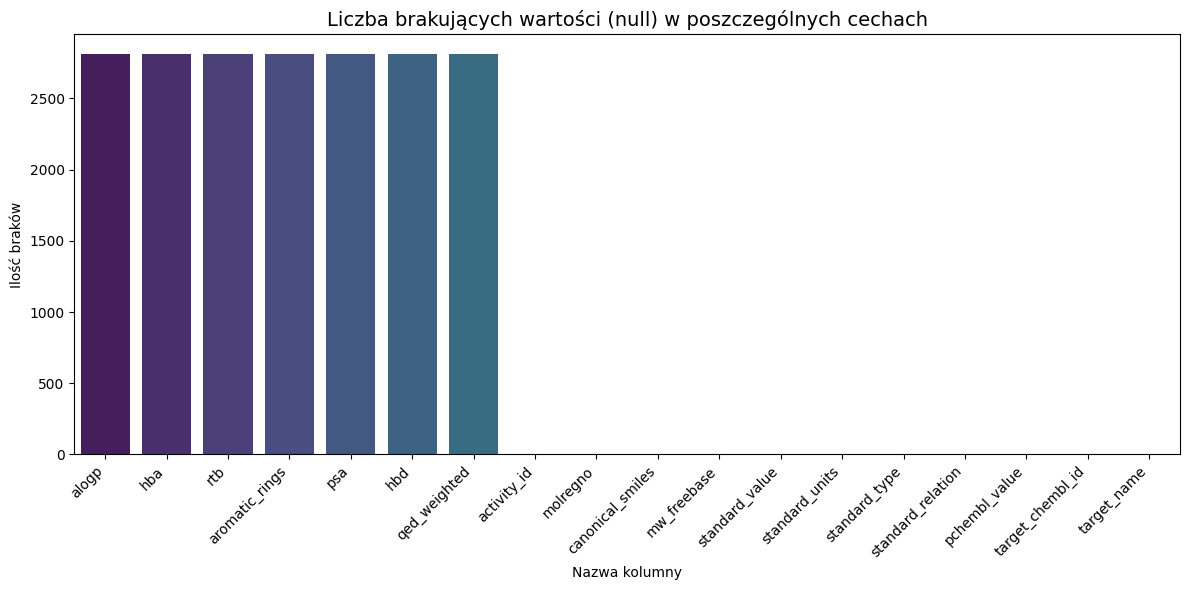

In [19]:
# 1. Obliczamy liczbę nulli dla każdej kolumny i zamieniamy na format długi (long)
null_data = df.null_count().to_pandas().melt(var_name="Cecha", value_name="Liczba_Nulli")

# 2. Sortujemy dane, aby wykres był czytelny
null_data = null_data.sort_values(by="Liczba_Nulli", ascending=False)

# 3. Tworzymy wykres
plt.figure(figsize=(12, 6))
sns.barplot(data=null_data, x="Cecha", y="Liczba_Nulli", palette="viridis")

# 4. Formatowanie wykresu
plt.title("Liczba brakujących wartości (null) w poszczególnych cechach", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Nazwa kolumny")
plt.ylabel("Ilość braków")
plt.tight_layout()
plt.show()

## 3. Correlation Analysis

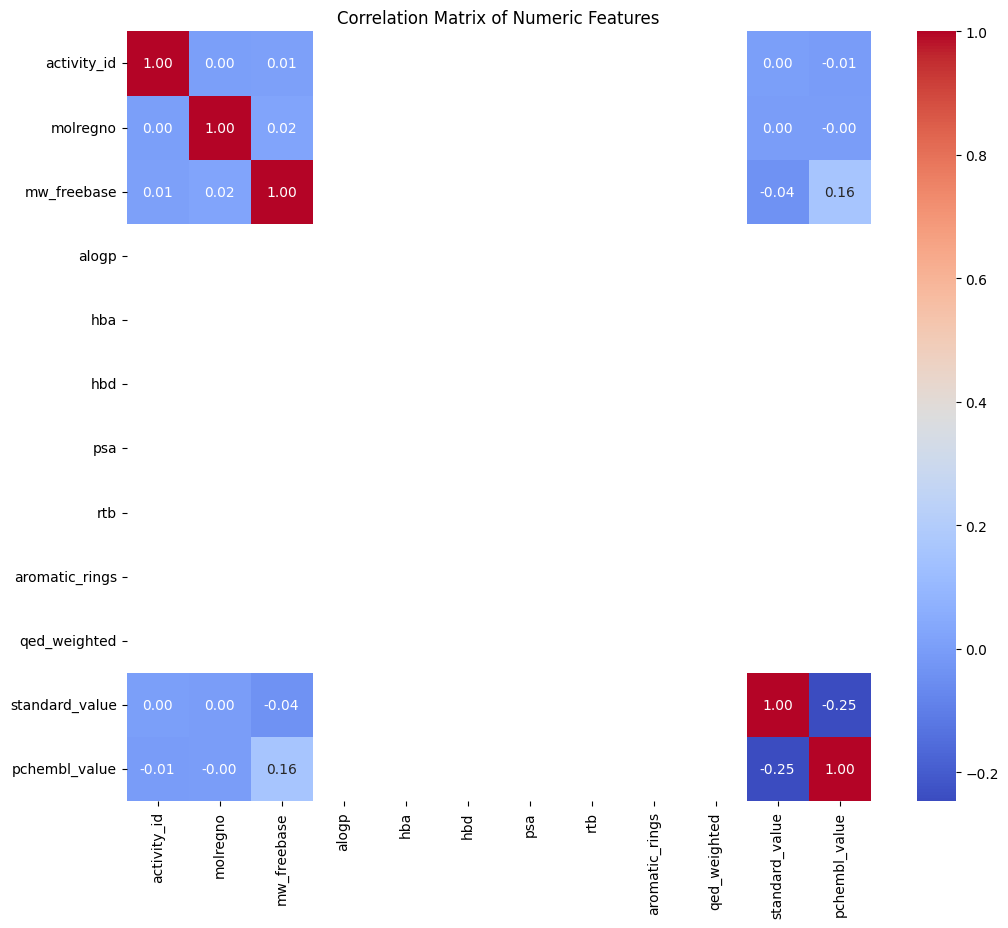

In [ ]:
# 1. Wybierz tylko kolumny numeryczne za pomocą selektora
numeric_df = df.select(cs.numeric())

# 2. Oblicz macierz korelacji
corr_matrix = numeric_df.corr()

# 3. Wyświetl heatmapę (Seaborn najlepiej współpracuje z formatem Pandas, więc tu robimy szybką konwersję)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.to_pandas(), annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 4. Outlier Detection

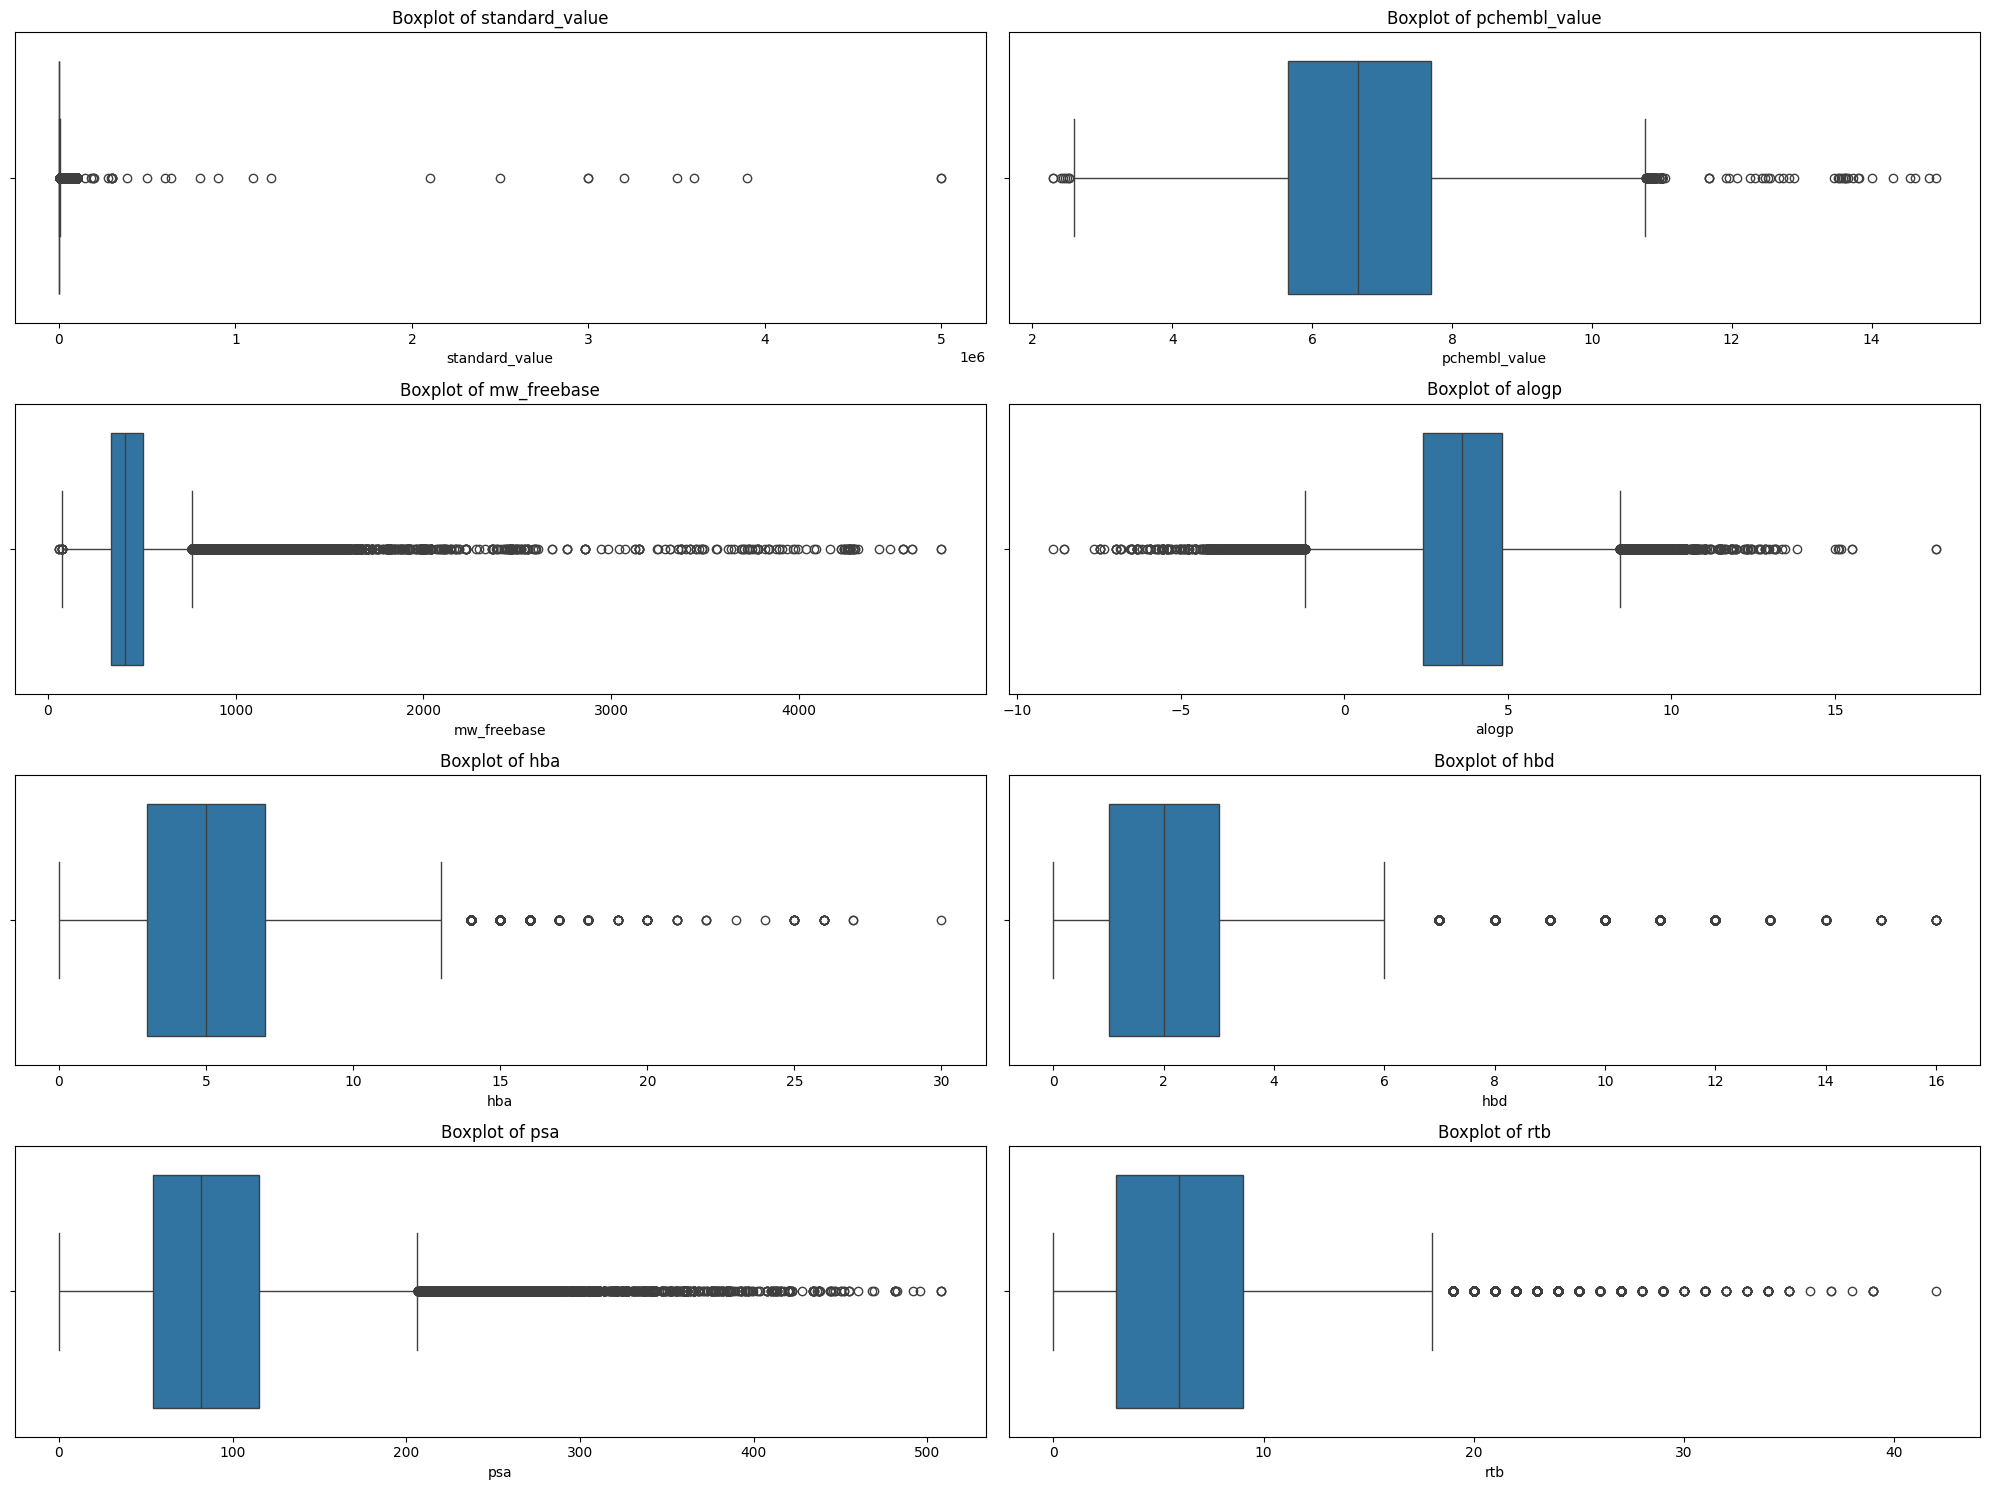

In [17]:
# Create boxplots for some key numerical columns to identify outliers
numerical_cols = ['standard_value', 'pchembl_value', 'mw_freebase', 'alogp', 'hba', 'hbd', 'psa', 'rtb']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    if col in df.columns:
        plt.subplot(4, 2, i + 1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## 5. Lipinski's Rule of Five Analysis

Lipinski Rule of Five Violations:
shape: (6, 2)
┌─────────────────────┬───────┐
│ lipinski_violations ┆ count │
│ ---                 ┆ ---   │
│ i8                  ┆ u32   │
╞═════════════════════╪═══════╡
│ null                ┆ 2810  │
│ 0                   ┆ 81230 │
│ 1                   ┆ 30791 │
│ 2                   ┆ 17457 │
│ 3                   ┆ 2179  │
│ 4                   ┆ 33    │
└─────────────────────┴───────┘


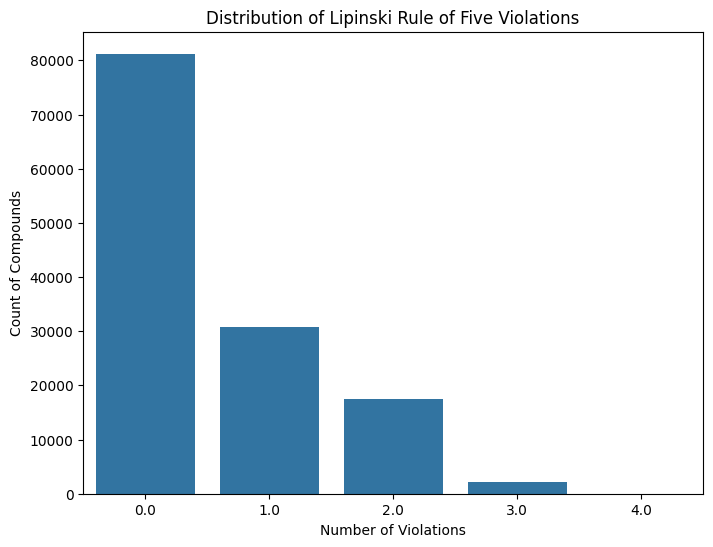

Percentage of drug-like compounds (0 or 1 violation): 83.29%


In [20]:
# 1. Tworzenie flag naruszeń (używamy with_columns zamiast przypisania w nawiasach)
lipinski_df = df.with_columns([
    (pl.col("mw_freebase") > 500).alias("mw_violation"),
    (pl.col("alogp") > 5).alias("logp_violation"),
    (pl.col("hbd") > 5).alias("hbd_violation"),
    (pl.col("hba") > 10).alias("hba_violation")
])

# 2. Obliczanie łącznej liczby naruszeń
lipinski_df = lipinski_df.with_columns(
    (pl.col("mw_violation").cast(pl.Int8) + 
     pl.col("logp_violation").cast(pl.Int8) + 
     pl.col("hbd_violation").cast(pl.Int8) + 
     pl.col("hba_violation").cast(pl.Int8)).alias("lipinski_violations")
)

# 3. Wyświetlenie statystyk
print('Lipinski Rule of Five Violations:')
print(lipinski_df["lipinski_violations"].value_counts().sort("lipinski_violations"))

# 4. Wykres (konwersja do Pandas tylko na potrzeby Seaborn)
plt.figure(figsize=(8, 6))
sns.countplot(x='lipinski_violations', data=lipinski_df.to_pandas())
plt.title('Distribution of Lipinski Rule of Five Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Count of Compounds')
plt.show()

# 5. Obliczanie procentu związków "drug-like"
drug_like_count = lipinski_df.filter(pl.col("lipinski_violations") <= 1).shape[0]
total_compounds = lipinski_df.shape[0]
print(f'Percentage of drug-like compounds (0 or 1 violation): {drug_like_count/total_compounds:.2%}')